# Trabajo Práctico

## Analizando información de egresados universitarios

Graduados universitarios del sistema Araucano (2016-2018)

Base de datos que contiene, para el período 2019-2021, información sociolaboral de un conjunto de graduados de carreras universitarias de universidades argentinas entre 2016 y 2018.

https://www.datos.gob.ar/dataset/produccion-graduados-universitarios-sistema-araucano-2016-2018

### Leer la base y descriptivas

Importar las librerías a utilizar: NumPy, Pandas y Matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Leer el archivo base_araucano.csv. Observar las primeras 5 filas.

In [2]:

df = pd.read_csv('base_araucano.csv')

print(df.head(5))



   id  rama_id  disciplina_id  tipo_titulo_id  gestion_id  genero_id  \
0   1        1              1               4           1          1   
1   1        1              1               4           1          1   
2   1        1              1               4           1          1   
3   2        1              1               4           1          1   
4   2        1              1               4           1          1   

   region_id  tamaño_id  letra_id  salario  anio  anioegreso  anionac  
0          1        NaN       NaN      NaN  2019        2017   1976.0  
1          1        NaN       NaN      NaN  2020        2017   1976.0  
2          1        NaN       NaN      NaN  2021        2017   1976.0  
3          2        NaN       NaN      NaN  2019        2018   1980.0  
4          2        NaN       NaN      NaN  2020        2018   1980.0  


Observar las columnas que contiene.

In [3]:
df.columns

Index(['id', 'rama_id', 'disciplina_id', 'tipo_titulo_id', 'gestion_id',
       'genero_id', 'region_id', 'tamaño_id', 'letra_id', 'salario', 'anio',
       'anioegreso', 'anionac'],
      dtype='object')

¿Cuál es el tamaño del dataframe? 

In [4]:
df.shape

# El tamaño del df es de 753827 filas y 13 columnas

(820335, 13)

Esta base viene acompañada de un diccionario de variables y de una [metodología](https://datos.produccion.gob.ar/dataset/46df1ebe-d0bb-49a1-96dd-fe9751930682/resource/a2b14e98-9874-4b2a-b641-cdba6676de45/download/metodologia-araucano-da.pdf). 

En la metodología dice: "Cada fila es una persona graduada en 2016-2018 con su situación laboral en noviembre de 2019, 2020 y 2021. De tal modo, cada persona aparece tres veces en la base."

Para no trabajar con observaciones duplicadas, vamos a observar solamente los datos de situación laboral de 2021. Para eso cree un nuevo dataframe filtrando solo los datos de ese año, utilizando la columna anio.

In [5]:
df_2021 = df.loc[df['anio'] == 2021]
print(df_2021.head())

    id  rama_id  disciplina_id  tipo_titulo_id  gestion_id  genero_id  \
2    1        1              1               4           1          1   
5    2        1              1               4           1          1   
8    3        2              2               4           1          2   
11   4        2              2               4           1          1   
14   5        1              3               4           1          2   

    region_id  tamaño_id  letra_id  salario  anio  anioegreso  anionac  
2           1        NaN       NaN      NaN  2021        2017   1976.0  
5           2        NaN       NaN      NaN  2021        2018   1980.0  
8           1        NaN       NaN      NaN  2021        2018   1987.0  
11          1        NaN       NaN      NaN  2021        2017   1985.0  
14          2        NaN       NaN      NaN  2021        2017   1970.0  


¿Cuál es el tamaño del nuevo dataframe? Considere ahora que cada línea pertenece a una persona particular.

In [6]:
df_2021.shape

# El tamaño del df 2021 es de 251274 filas

(273445, 13)

De ahora en más continuaremos trabajando con el dataframe de 2021.

Haga un análisis rápido del dataframe. ¿Cuántas observaciones tiene cada columna, el valor promedio, desvío, el valor mínimo, etc?

In [7]:
df_2021.describe()

,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac
count,273445.000000,273445.000000,273445.000000,273445.000000,273445.000000,273445.000000,273445.000000,162917.000000,162860.000000,1.629170e+05,273445.0,273445.000000,273049.000000
mean,136723.000000,2.150261,10.421990,2.751793,1.208930,1.395619,2.811487,3.593769,8.260488,1.459046e+05,2021.0,2017.138968,1986.687338
std,78936.916517,1.198290,8.207475,0.704809,0.406545,0.488984,1.675058,0.806771,5.695679,1.292888e+05,0.0,0.802212,7.905726
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e-02,2021.0,2016.000000,1940.000000
25%,68362.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,4.000000,2.000000,7.850309e+04,2021.0,2016.000000,1984.000000
50%,136723.000000,2.000000,9.000000,3.000000,1.000000,1.000000,3.000000,4.000000,10.000000,1.193044e+05,2021.0,2017.000000,1989.000000
75%,205084.000000,3.000000,18.000000,3.000000,1.000000,2.000000,3.000000,4.000000,13.000000,1.818517e+05,2021.0,2018.000000,1992.000000
max,273445.000000,6.000000,38.000000,4.000000,2.000000,2.000000,7.000000,4.000000,20.000000,8.444075e+06,2021.0,2018.000000,1999.000000


En la metodología vemos que la variable salario constituye la remuneración bruta en pesos corrientes correspondiente al mes de noviembre. Este campo solo aparece en el caso de que la persona aparezca en el SIPA en el año de referencia. Si la persona apareciera en el SIPA en 2019 pero no en 2020 y 2021, los campos ligados a la situación ocupacional aparecerían en blanco (esto no significa que la persona no haya trabajado en esos años, sino que no lo hicieron como
asalariadas formales).

Muestre la media, el valor mínimo, máximo y la mediana de los salarios utilizando la librería numpy.

Para esto, no utilice las funciones comunes de np.mean, np.max, etc. Utilice la función np.nanmean, np.nanmax, np.nanmin y np.nanmedian que van a excluir a todos los valores en blanco. 
Ej: https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html

In [8]:
salarios = df['salario'].to_numpy()

print(f"La media es: {np.nanmean(salarios)} , la mediana es {np.nanmedian(salarios)}, el minimo es {np.nanmin(salarios)} y, el máximo {np.nanmax(salarios)} ")


La media es: 99769.27818223694 , la mediana es 76264.422, el minimo es 0.0099999998 y, el máximo 9518290.0 


### Analizando el género 

Grafique la columna genero_id considerando que los valores son:
* 1: Mujer
* 2: Varón

¿Cómo se encuentran distribuidas estas categorías? Haga un gráfico que lo muestre.

<BarContainer object of 2 artists>

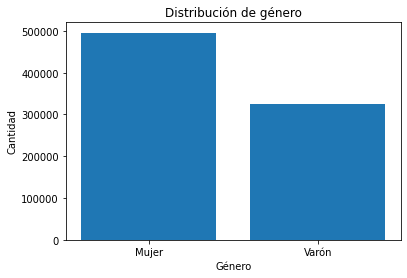

In [24]:

distribucion_genero = df['genero_id'].value_counts()
categorias = ['Mujer', 'Varón']
valores = [distribucion_genero[1], distribucion_genero[2]]

plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de género')

plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de género')

plt.bar(categorias, valores)





### Leer el diccionario de variables

En el caso anterior es fácil trabajar con la variable de género porque son solo dos valores. Pero cuando tenemos más códigos vamos a necesitar conocer qué variables utilizamos.

Para eso vamos a leer algunas variables del diccionario para trabajar más facilmente con ellas. Para eso vamos a leer algunas hojas del archivo diccionario.xlsx. Por default va a leer la primera hoja y no el resto.

¿Cómo aclaramos qué hoja queremos leer? Agregando la variable sheet_name con el nombre como se ve a continuación.



In [13]:

nombre_hoja = "cod_rama"
rama_df = pd.read_excel('diccionario.xlsx', sheet_name=nombre_hoja)

rama_df.head()

,rama,rama_id
0,Ciencias Sociales,1
1,Ciencias Aplicadas,2
2,Ciencias de la Salud,3
3,Ciencias Humanas,4
4,Ciencias Básicas,5


Ahora que tenemos nuestro código de ramas vamos a mergear la base de araucano (df) con el dataframe de ramas.

In [14]:

ramas = dict(rama_df[['rama_id', 'rama']].values)
df['rama_id'] = df['rama_id'].map(ramas)
df.head()

,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac
0,1,Ciencias Sociales,1,4,1,1,1,NaN,NaN,NaN,2019,2017,1976.0
1,1,Ciencias Sociales,1,4,1,1,1,NaN,NaN,NaN,2020,2017,1976.0
2,1,Ciencias Sociales,1,4,1,1,1,NaN,NaN,NaN,2021,2017,1976.0
3,2,Ciencias Sociales,1,4,1,1,2,NaN,NaN,NaN,2019,2018,1980.0
4,2,Ciencias Sociales,1,4,1,1,2,NaN,NaN,NaN,2020,2018,1980.0


### ¿Cuántos egresados hay por rama?

Agrupe por rama y mire la cantidad de egresados de cada una. Es decir, cuántos egresados hay de Ciencias Sociales, cuántos de Ciencias Aplicadas, etc.

Para esto utilice dos funciones distintas para llegar al mismo resultado.

In [15]:
print(df['rama_id'].value_counts())



Ciencias Sociales       336204
Ciencias Aplicadas      192783
Ciencias de la Salud    151791
Ciencias Humanas        114693
Ciencias Básicas         21165
Sin Rama                  3699
Name: rama_id, dtype: int64


In [16]:
print(df.groupby('rama_id').size())

rama_id
Ciencias Aplicadas      192783
Ciencias Básicas         21165
Ciencias Humanas        114693
Ciencias Sociales       336204
Ciencias de la Salud    151791
Sin Rama                  3699
dtype: int64


### Año de nacimiento


Muestre algunas métricas descriptivas de la variable de año de nacimiento.

In [17]:
df['anionac'].describe()




count    819147.000000
mean       1986.687338
std           7.905716
min        1940.000000
25%        1984.000000
50%        1989.000000
75%        1992.000000
max        1999.000000
Name: anionac, dtype: float64

Ahora grafique un histograma del año de nacimiento de las personas de la base.

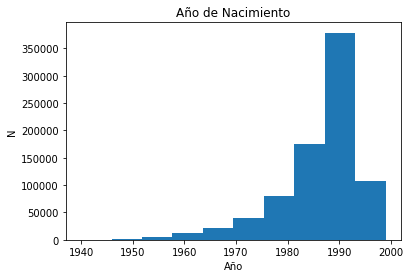

In [18]:

plt.hist(df['anionac'])
plt.title('Año de Nacimiento')
plt.xlabel('Año')
plt.ylabel('N')
plt.show()

*Punto bonus*

Ahora, sabiendo cómo filtrar el dataframe por género grafique en un histograma la edad de ambos grupos, en dos colores distintos. Para esto considere lo siguiente:
* Con el parámetro color puede cambiar el color de los bins. Ej: color = 'red' cambiará el histograma a rojo.
* Ejemplos de histogramas con dos series distintas: https://www.geeksforgeeks.org/overlapping-histograms-with-matplotlib-in-python/

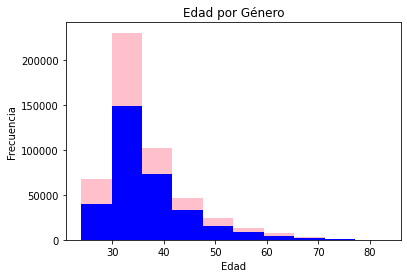

In [19]:
df['edad'] = 2023 - df['anionac']
#filtro
df_1 = df[df['genero_id'] == 1]  # Mujer
df_2 = df[df['genero_id'] == 2]  # Varón

#grafico
plt.hist(df_1['edad'], color='pink')
plt.hist(df_2['edad'], color= 'blue')
plt.title('Edad por Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Año de nacimiento y rama estudiada

Ahora vamos a ver si hay alguna diferencia en los años de nacimiento de aquellos que decidieron estudiar Ciencias Sociales y aquellos que decidieron estudiar Ciencias Aplicadas.

Para eso, puede utilizar algún gráfico que muestre por separado a los egresados de Ciencias Sociales y Ciencias Aplicadas según año de nacimiento y compararlos.

O también puede agrupar estos datos según las ramas y ver cuál es el año de nacimiento que tiene mayores inscriptos en uno y en otro y cuál el menor y ver alguna diferencia allí.

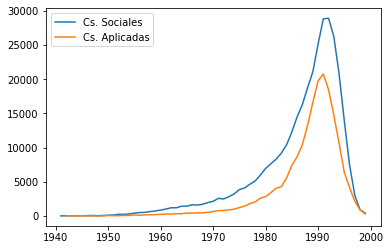

In [20]:

# filtro
cs_sociales = df[df['rama_id'] == 'Ciencias Sociales']
cs_aplicadas = df[df['rama_id'] == 'Ciencias Aplicadas']
# Grafico
sociales= cs_sociales['anionac'].value_counts().sort_index()
aplicadas = cs_aplicadas['anionac'].value_counts().sort_index()
plt.plot(sociales.index, sociales.values, label='Cs. Sociales')
plt.plot(aplicadas.index, aplicadas.values, label='Cs. Aplicadas')
plt.legend()
plt.show()

In [21]:
df_filtro = df[df['rama_id'].isin(['Ciencias Sociales', 'Ciencias Aplicadas'])]
df_filtro.groupby(['rama_id', 'anionac']).size()

rama_id             anionac
Ciencias Aplicadas  1942.0         9
                    1944.0         3
                    1945.0        30
                    1946.0         6
                    1947.0         6
                               ...  
Ciencias Sociales   1995.0     13917
                    1996.0      7488
                    1997.0      3027
                    1998.0       900
                    1999.0       405
Length: 116, dtype: int64